In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

c:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\rikdifos\credit-card-approval-prediction\versions\3


In [2]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
for f,d,r in os.walk(path):
  print(f,d,r)
cred = pd.read_csv(f+'/credit_record.csv')
app = pd.read_csv(f+'/application_record.csv')

C:\Users\sande\.cache\kagglehub\datasets\rikdifos\credit-card-approval-prediction\versions\3 [] ['application_record.csv', 'credit_record.csv']


In [4]:
print("Printing first 5 rows of application_record.csv")
print(app.head())
print("Printing first 5 rows of credit_record.csv")
print(cred.head())

Printing first 5 rows of application_record.csv
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0      

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


C:\Users\sande\AppData\Local\Temp\ipykernel_24976\2221534795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OCCUPATION_TYPE',data=app,palette='Set2')


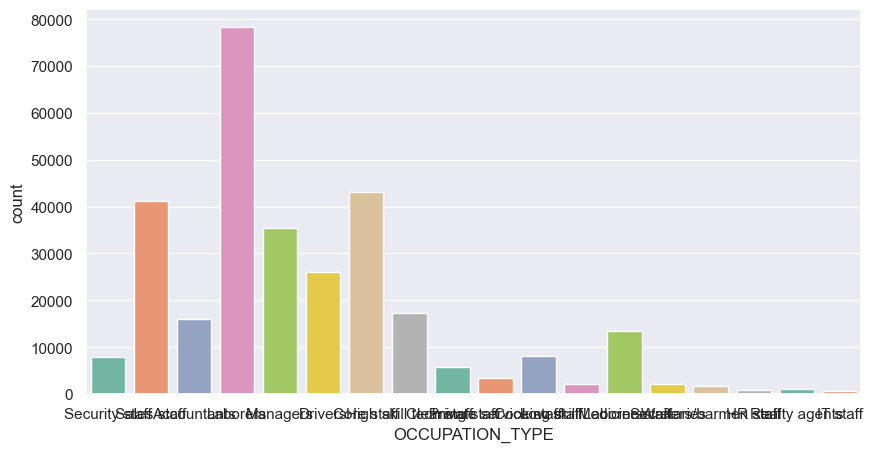

Types of house of people
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


C:\Users\sande\AppData\Local\Temp\ipykernel_24976\2221534795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_HOUSING_TYPE',data=app,palette='Set2')


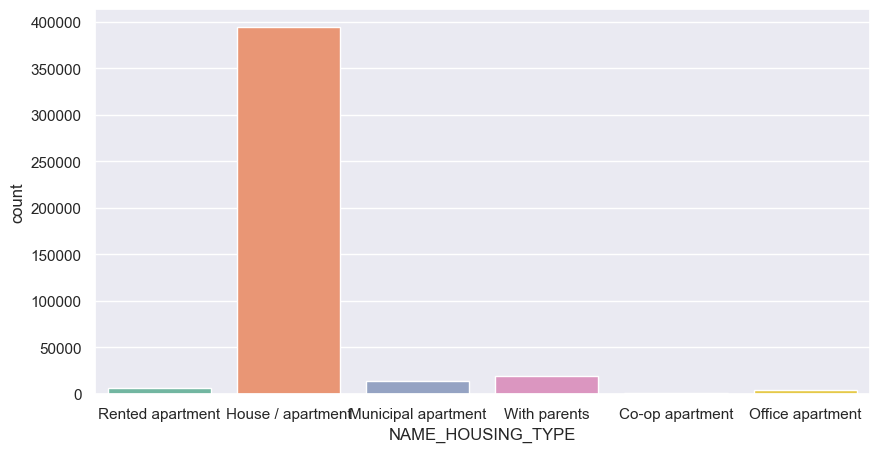

Income types of a person
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


C:\Users\sande\AppData\Local\Temp\ipykernel_24976\2221534795.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_INCOME_TYPE',data=app,palette='Set2')


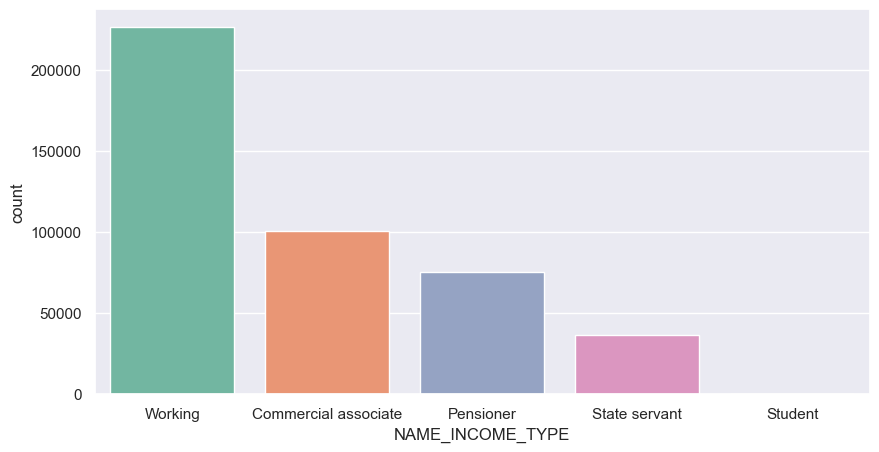

In [5]:
#Univariate analysis
sns.set(rc={'figure.figsize':(10,5)})
print(app['OCCUPATION_TYPE'].value_counts())
sns.countplot(x='OCCUPATION_TYPE',data=app,palette='Set2')
plt.show()
print("Types of house of people")
print(app['NAME_HOUSING_TYPE'].value_counts())
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='NAME_HOUSING_TYPE',data=app,palette='Set2')
plt.show()
print("Income types of a person")
print(app['NAME_INCOME_TYPE'].value_counts())
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='NAME_INCOME_TYPE',data=app,palette='Set2')
plt.show()

No of people working status
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


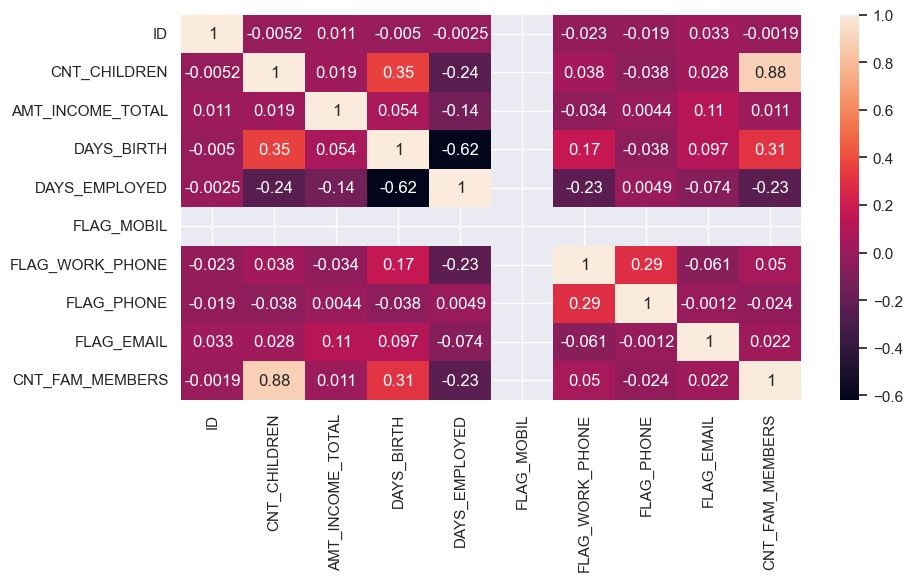

In [6]:
#Multivariate analysis
print("No of people working status")
print(app['OCCUPATION_TYPE'].value_counts())
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(app.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [7]:
#Descriptive analysis
print("Application Description")
print(app.describe())
print("-"*100)
print("Credit Card Description")
print(cred.describe())

Application Description
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000

In [8]:
print("Before removal of Duplicates",app.shape)
app = app.drop_duplicates(subset='ID',keep='first')
print("After removal of Duplicates",app.shape)

Before removal of Duplicates (438557, 18)
After removal of Duplicates (438510, 18)


In [9]:
print("NULL Values:")
print(app.isnull().mean())

NULL Values:
ID                     0.00000
CODE_GENDER            0.00000
FLAG_OWN_CAR           0.00000
FLAG_OWN_REALTY        0.00000
CNT_CHILDREN           0.00000
AMT_INCOME_TOTAL       0.00000
NAME_INCOME_TYPE       0.00000
NAME_EDUCATION_TYPE    0.00000
NAME_FAMILY_STATUS     0.00000
NAME_HOUSING_TYPE      0.00000
DAYS_BIRTH             0.00000
DAYS_EMPLOYED          0.00000
FLAG_MOBIL             0.00000
FLAG_WORK_PHONE        0.00000
FLAG_PHONE             0.00000
FLAG_EMAIL             0.00000
OCCUPATION_TYPE        0.30602
CNT_FAM_MEMBERS        0.00000
dtype: float64


In [10]:
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'] + app['CNT_CHILDREN']
app = app.drop(['CNT_CHILDREN','FLAG_PHONE','FLAG_EMAIL','FLAG_WORK_PHONE','OCCUPATION_TYPE','FLAG_MOBIL'],axis=1)
print(app.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS'],
      dtype='object')


In [11]:
app['DAYS_BIRTH'] = np.abs(app['DAYS_BIRTH']/365)
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED']/365
print(app.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
0  5008804           M            Y               Y          427500.0   
1  5008805           M            Y               Y          427500.0   
2  5008806           M            Y               Y          112500.0   
3  5008808           F            N               Y          270000.0   
4  5008809           F            N               Y          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  
0   Rented ap

In [12]:
housing_type = {'House / apartment': 'House / apartment','With parents': 'With parents','Municipal apartment': 'House / apartment','Rented apartment': 'House / apartment','Office apartment': 'House / apartment','Co-op apartment': 'House / apartment'}

income_type = {'Commercial associate': 'Working','State servant': 'Working','Working': 'Working','Pensioner': 'Pensioner','Student': 'Student'}

education_type = {'Secondary / secondary special': 'secondary','Lower secondary': 'secondary','Higher education': 'Higher education','Incomplete higher': 'Higher education','Academic degree': 'Academic degree'}

family_status = {'Single / not married': 'Single','Separated': 'Single','Widow': 'Single','Civil marriage': 'Married','Married': 'Married'}

app['NAME_HOUSING_TYPE'] = app['NAME_HOUSING_TYPE'].map(housing_type)
app['NAME_INCOME_TYPE'] = app['NAME_INCOME_TYPE'].map(income_type)
app['NAME_EDUCATION_TYPE'] = app['NAME_EDUCATION_TYPE'].map(education_type)
app['NAME_FAMILY_STATUS'] = app['NAME_FAMILY_STATUS'].map(family_status)

In [13]:
print(app['NAME_EDUCATION_TYPE'].value_counts())

NAME_EDUCATION_TYPE
secondary           305839
Higher education    132359
Academic degree        312
Name: count, dtype: int64


In [14]:
print("Information about credit_record.csv",cred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
Information about credit_record.csv None


In [15]:
grouped = cred.groupby('ID')
pivot_tb = cred.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:, 0:61] == 'C'].count(axis=1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '0'].count(axis=1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '1'].count(axis=1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '2'].count(axis=1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '3'].count(axis=1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '4'].count(axis=1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:, 0:61] == '5'].count(axis=1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:, 0:61] == 'X'].count(axis=1)
pivot_tb['ID'] = pivot_tb.index


In [16]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89']
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']

        overall_pastdues = over_1 + over_30 + over_60 + over_90 + over_120

        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)

        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)

        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)

    return good_or_bad

In [17]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = (
    pivot_tb['pastdue_1-29'].values +
    pivot_tb['pastdue_30-59'].values +
    pivot_tb['pastdue_60-89'].values +
    pivot_tb['pastdue_90-119'].values +
    pivot_tb['pastdue_120-149'].values +
    pivot_tb['pastdue_over_150'].values
)
target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
print(target['target'].value_counts())
target

target
0    24648
1    21337
Name: count, dtype: int64


,ID,paid_off,#_of_pastdues,no_loan,target
0,5001711,0,3,1,0
1,5001712,9,10,0,0
2,5001713,0,0,22,1
3,5001714,0,0,15,1
4,5001715,0,0,60,1
...,...,...,...,...,...
45980,5150482,6,12,0,0
45981,5150483,0,0,18,1
45982,5150484,1,12,0,0
45983,5150485,0,2,0,0


In [18]:
credit_app = app.merge(target,how='inner',on='ID')
credit_app.drop('ID',axis=1,inplace=True)
credit_app.to_csv('credit_app.csv',index=False)
print(credit_app.head())

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL NAME_INCOME_TYPE  \
0           M            Y               Y          427500.0          Working   
1           M            Y               Y          427500.0          Working   
2           M            Y               Y          112500.0          Working   
3           F            N               Y          270000.0          Working   
4           F            N               Y          270000.0          Working   

  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  \
0    Higher education            Married  House / apartment   32.890411   
1    Higher education            Married  House / apartment   32.890411   
2           secondary            Married  House / apartment   58.832877   
3           secondary             Single  House / apartment   52.356164   
4           secondary             Single  House / apartment   52.356164   

   DAYS_EMPLOYED  CNT_FAM_MEMBERS  paid_off  #_of_pastdues  no

In [19]:
cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()
credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])
print(credit_app.head())

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
0            1             1                1          427500.0   
1            1             1                1          427500.0   
2            1             1                1          112500.0   
3            0             0                1          270000.0   
4            0             0                1          270000.0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 2                    1                   0   
1                 2                    1                   0   
2                 2                    2                   0   
3                 2                    2                   1   
4                 2                    2                   1   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  paid_off  \
0                  0   32.890411     -12.443836              2.0        13   
1                  0   32.890411     -12.443836         

In [20]:
print("Mapping :", list(zip(cg.classes_, range(len(cg.classes_)))))
print("Mapping :", list(zip(oc.classes_, range(len(oc.classes_)))))
print("Mapping :", list(zip(own_r.classes_, range(len(own_r.classes_)))))
print("Mapping :", list(zip(it.classes_, range(len(it.classes_)))))
print("Mapping :", list(zip(et.classes_, range(len(et.classes_)))))
print("Mapping :", list(zip(fs.classes_, range(len(fs.classes_)))))
print("Mapping :", list(zip(ht.classes_, range(len(ht.classes_)))))

Mapping : [('F', 0), ('M', 1)]
Mapping : [('N', 0), ('Y', 1)]
Mapping : [('N', 0), ('Y', 1)]
Mapping : [('Pensioner', 0), ('Student', 1), ('Working', 2)]
Mapping : [('Academic degree', 0), ('Higher education', 1), ('secondary', 2)]
Mapping : [('Married', 0), ('Single', 1)]
Mapping : [('House / apartment', 0), ('With parents', 1)]


In [21]:
x = credit_app.drop('target',axis=1)
y = credit_app['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
def logistic_regression(x_train,x_test,y_train,y_test):
  print("Logistic Regression")
  lr=LogisticRegression(solver='lbfgs')
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  print("\n Confusion matrix:",confusion_matrix(y_test,y_pred))
  print("\n Classification report:",classification_report(y_test,y_pred))
  print("\n F1 score:",f1_score(y_test,y_pred))
  print("-"*100)
  return lr
logistic_regression(x_train,x_test,y_train,y_test)

def random_forest(x_train,x_test,y_train,y_test):
  print("Random Forest")
  rf = RandomForestClassifier()
  rf.fit(x_train, y_train)
  y_pred = rf.predict(x_test)
  print("\n Confusion matrix:",confusion_matrix(y_test,y_pred))
  print("\n Classification report:",classification_report(y_test,y_pred))
  print("\n F1 score:",f1_score(y_test,y_pred))
  print("-"*100)
  return rf
random_forest(x_train,x_test,y_train,y_test)

def xgboost(x_train,x_test,y_train,y_test):
  print("XGBoost")
  gb = GradientBoostingClassifier()
  gb.fit(x_train, y_train)
  y_pred = gb.predict(x_test)
  print("\n Confusion matrix:",confusion_matrix(y_test,y_pred))
  print("\n Classification report:",classification_report(y_test,y_pred))
  print("\n F1 score:",f1_score(y_test,y_pred))
  print("-"*100)
  return gb
xgboost(x_train,x_test,y_train,y_test)

def decision_tree_before_hypertuning(x_train,x_test,y_train,y_test):
  print("Decision Tree")
  dt=DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  print("\n Confusion matrix:",confusion_matrix(y_test,y_pred))
  print("\n Classification report:",classification_report(y_test,y_pred))
  print("\n F1 score:",f1_score(y_test,y_pred))
  print("-"*100)
  return dt
decision_tree_before_hypertuning(x_train,x_test,y_train,y_test)

def decision_tree_after_hypertuning(x_train, x_test, y_train, y_test):
    print("Decision Tree - Starting with GridSearchCV")

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
    }

    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=2
    )

    print("Fitting the model with parameter grid...")
    grid_search.fit(x_train, y_train)

    print("Best parameters found:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    print("\nF1 score:", f1_score(y_test, y_pred))
    print("-" * 100)

    return best_model
decision_tree_after_hypertuning(x_train, x_test, y_train, y_test)

Logistic Regression


c:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Confusion matrix: [[3933   41]
 [  44 3274]]

 Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3974
           1       0.99      0.99      0.99      3318

    accuracy                           0.99      7292
   macro avg       0.99      0.99      0.99      7292
weighted avg       0.99      0.99      0.99      7292


 F1 score: 0.9871852856927483
----------------------------------------------------------------------------------------------------
Random Forest

 Confusion matrix: [[3964   10]
 [  18 3300]]

 Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3974
           1       1.00      0.99      1.00      3318

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292


 F1 score: 0.995775497887749
--------------------------

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
def compare_models(x_train,x_test,y_train,y_test):
  lr = logistic_regression(x_train,x_test,y_train,y_test)
  rf = random_forest(x_train,x_test,y_train,y_test)
  gb = xgboost(x_train,x_test,y_train,y_test)
  dt = decision_tree_before_hypertuning(x_train,x_test,y_train,y_test)
  dt2 = decision_tree_after_hypertuning(x_train,x_test,y_train,y_test)
  return lr,rf,gb,dt,dt2
compare_models(x_train,x_test,y_train,y_test)

Logistic Regression


c:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Confusion matrix: [[3933   41]
 [  44 3274]]

 Classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3974
           1       0.99      0.99      0.99      3318

    accuracy                           0.99      7292
   macro avg       0.99      0.99      0.99      7292
weighted avg       0.99      0.99      0.99      7292


 F1 score: 0.9871852856927483
----------------------------------------------------------------------------------------------------
Random Forest

 Confusion matrix: [[3967    7]
 [  18 3300]]

 Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3974
           1       1.00      0.99      1.00      3318

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292


 F1 score: 0.9962264150943396
-------------------------

(LogisticRegression(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(criterion='entropy', random_state=42))

In [24]:
c_card_model=decision_tree_after_hypertuning(x_train,x_test,y_train,y_test)
filename = 'c_card_model.pkl'
pickle.dump(c_card_model,open(filename,'wb'))

Decision Tree - Starting with GridSearchCV
Fitting the model with parameter grid...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': None}

Confusion matrix:
 [[3974    0]
 [   3 3315]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3974
           1       1.00      1.00      1.00      3318

    accuracy                           1.00      7292
   macro avg       1.00      1.00      1.00      7292
weighted avg       1.00      1.00      1.00      7292


F1 score: 0.9995477159656264
----------------------------------------------------------------------------------------------------


In [25]:
for i in range(10,20):
  x = credit_app.iloc[[i]]
  print(x)
  x = x.drop('target',axis=1)
  y = c_card_model.predict(x)
  print(y)
  print('-'*100)

    CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
10            1             1                1          270000.0   

    NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
10                 2                    1                   0   

    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  paid_off  \
10                  0   46.224658      -2.106849              2.0         0   

    #_of_pastdues  no_loan  target  
10              6        0       0  
[0]
----------------------------------------------------------------------------------------------------
    CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
11            1             1                1          270000.0   

    NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
11                 2                    1                   0   

    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  paid_off  \
11                  0   46.224658      -2.10684